<font size = 5>**LAB 12**</font>

<font size = 4>**Question 1**</font>

1)Implement SVM to classify the type of iris flower based on its sepal length and width using the iris dataset? 

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [84]:
#1) Loading the iris dataset

iris = datasets.load_iris()

#features , sepal features
X = iris.data
X = X[:,:2]

#target 
Y = iris.target

#2) Train test split 
X_train, X_test , Y_train, Y_test = train_test_split(X,Y,test_size = 0.25,random_state=100)


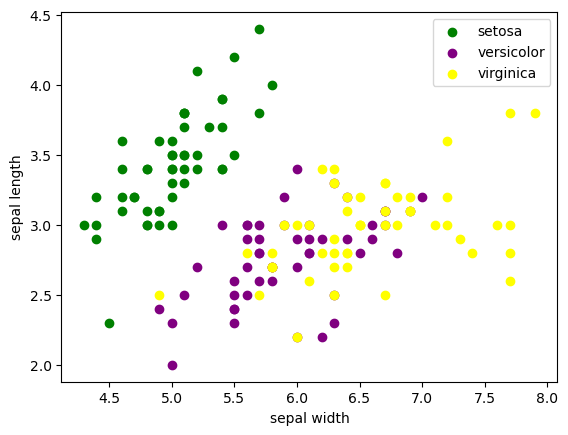

In [87]:

#3) Visualizing the data

datapoints = np.concatenate((X.T,Y.reshape((1,150))),axis = 0).T

for i in range(150):
    datapoints[i][2] = int(round(datapoints[i][2],0))
setosa = datapoints[datapoints[:,2] == 0]
versicolor = datapoints[datapoints[:,2] == 1] 
virginica = datapoints[datapoints[:,2] == 2]

plt.scatter(setosa.T[0],setosa.T[1],color = "green",label = "setosa")
plt.scatter(versicolor.T[0],versicolor.T[1],color = "purple",label = "versicolor")
plt.scatter(virginica.T[0],virginica.T[1],color = "yellow",label = "virginica")
plt.xlabel("sepal width")
plt.ylabel("sepal length")


plt.legend()
plt.show()



In [88]:

#4. Initialising and training the model

svmmodel = SVC(kernel="linear")
svmmodel.fit(X_train,Y_train)


SVC(kernel='linear')

In [89]:

#5. Testing the model

predictions = svmmodel.predict(X_test)

print("Accuracy score:",accuracy_score(Y_test,predictions))

print("Classification report:\n",classification_report(Y_test,predictions))


Accuracy score: 0.7894736842105263
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.58      0.70      0.64        10
           2       0.75      0.64      0.69        14

    accuracy                           0.79        38
   macro avg       0.78      0.78      0.78        38
weighted avg       0.80      0.79      0.79        38



2)Also try to use the scikit-learn digits dataset and an SVM to classify handwritten digits? 

In [90]:
from matplotlib import colors

#1. Load the digits dataset
digits = datasets.load_digits()
n = len(digits.images)

data = digits.images.reshape((n, 64))


Zero


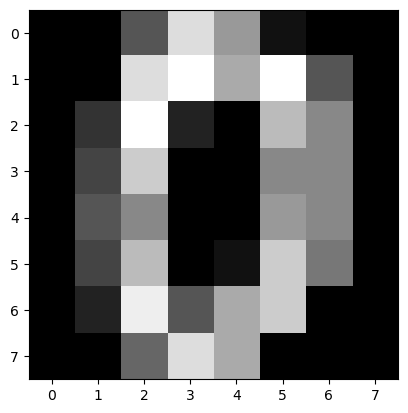

In [91]:

#2. Visualizing some digits
print("Zero")
plt.imshow(digits.images[0],cmap="gray")
plt.show()


One


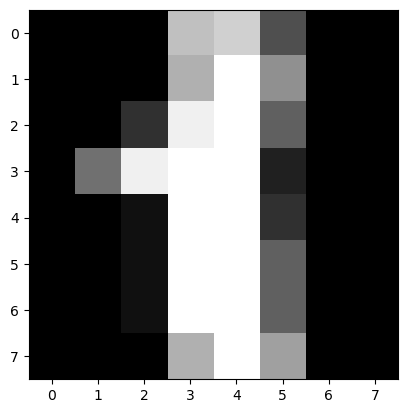

In [92]:

print("One")
plt.imshow(digits.images[1],cmap="gray")
plt.show()


In [93]:

#3. Splitting
X_train, X_test, Y_train, Y_test = train_test_split(data, digits.target, test_size=0.3, shuffle=True)


In [94]:

#4. Initialising and training the model
model = SVC(gamma = 0.001)
model.fit(X_train, Y_train)


SVC(gamma=0.001)

In [95]:

#5. Testing the model
predicted = model.predict(X_test)

print("Accuracy score:",accuracy_score(Y_test,predicted))

print("Classification report:\n",classification_report(Y_test,predicted))


Accuracy score: 0.9944444444444445
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.97      1.00      0.98        56
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        65
           4       1.00      1.00      1.00        50
           5       1.00      0.98      0.99        42
           6       1.00      1.00      1.00        49
           7       1.00      1.00      1.00        58
           8       1.00      0.96      0.98        55
           9       0.98      1.00      0.99        57

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



<font size = 4>**Question 2**</font>



In [97]:
from sklearn import decomposition
import numpy as np

X = iris.data


In [102]:

#1. Use the eigendecomposition of numpy library to do PCA

means = np.sum(X,axis = 0)/X.shape[0]
means = np.tile(means,(X.shape[0],1)) #also can do np.array([sum]*N) or some vstack thing also there
X = X - means

#Got the mean centered array now 
#We have to X.T@X to get covariance matrix

cov_mat = X.T@X

#Do eigen decomp on this 

eigenval,eigenvec = np.linalg.eigh(cov_mat)
eigenvec = eigenvec[:,1:]  #took top three eigenvalues
eigenvec = np.flip(eigenvec,axis = 1) #Flip along the second axis (along 2nd indice , i.e eigenvec[:,-1] swapped with eigenvec[:,0] and similar)

#find the new features by multiplying

newfeatures1 = X@eigenvec
print("New featues with numpy eigen decomposition:\n",newfeatures1)

#As we see , we get the same features upto a constant factor (-1 only difference here)
#That won't matter as in any model we have a weight which can be -ve or +ve , takes care of this 


New featues with numpy eigen decomposition:
 [[ 2.68412563  0.31939725  0.02791483]
 [ 2.71414169 -0.17700123  0.21046427]
 [ 2.88899057 -0.14494943 -0.01790026]
 [ 2.74534286 -0.31829898 -0.03155937]
 [ 2.72871654  0.32675451 -0.09007924]
 [ 2.28085963  0.74133045 -0.16867766]
 [ 2.82053775 -0.08946138 -0.25789216]
 [ 2.62614497  0.16338496  0.02187932]
 [ 2.88638273 -0.57831175 -0.02075957]
 [ 2.6727558  -0.11377425  0.19763272]
 [ 2.50694709  0.6450689   0.07531801]
 [ 2.61275523  0.01472994 -0.10215026]
 [ 2.78610927 -0.235112    0.20684443]
 [ 3.22380374 -0.51139459 -0.06129967]
 [ 2.64475039  1.17876464  0.15162752]
 [ 2.38603903  1.33806233 -0.2777769 ]
 [ 2.62352788  0.81067951 -0.13818323]
 [ 2.64829671  0.31184914 -0.02666832]
 [ 2.19982032  0.87283904  0.12030552]
 [ 2.5879864   0.51356031 -0.21366517]
 [ 2.31025622  0.39134594  0.23944404]
 [ 2.54370523  0.43299606 -0.20845723]
 [ 3.21593942  0.13346807 -0.29239675]
 [ 2.30273318  0.09870885 -0.03912326]
 [ 2.35575405 -0.03

In [103]:

#Use pca function from sklearn to do pca

pca = decomposition.PCA(n_components=3)
pca.fit(X)

newfeatures2 = pca.transform(X)
print("New features with pca functionality in sklearn library:\n", newfeatures2)


New features with pca functionality in sklearn library:
 [[-2.68412563  0.31939725 -0.02791483]
 [-2.71414169 -0.17700123 -0.21046427]
 [-2.88899057 -0.14494943  0.01790026]
 [-2.74534286 -0.31829898  0.03155937]
 [-2.72871654  0.32675451  0.09007924]
 [-2.28085963  0.74133045  0.16867766]
 [-2.82053775 -0.08946138  0.25789216]
 [-2.62614497  0.16338496 -0.02187932]
 [-2.88638273 -0.57831175  0.02075957]
 [-2.6727558  -0.11377425 -0.19763272]
 [-2.50694709  0.6450689  -0.07531801]
 [-2.61275523  0.01472994  0.10215026]
 [-2.78610927 -0.235112   -0.20684443]
 [-3.22380374 -0.51139459  0.06129967]
 [-2.64475039  1.17876464 -0.15162752]
 [-2.38603903  1.33806233  0.2777769 ]
 [-2.62352788  0.81067951  0.13818323]
 [-2.64829671  0.31184914  0.02666832]
 [-2.19982032  0.87283904 -0.12030552]
 [-2.5879864   0.51356031  0.21366517]
 [-2.31025622  0.39134594 -0.23944404]
 [-2.54370523  0.43299606  0.20845723]
 [-3.21593942  0.13346807  0.29239675]
 [-2.30273318  0.09870885  0.03912326]
 [-2.35

As we can see our PCA is giving similar results as the pca functionality in sklearn , so we can say we were successsful in it ! 